In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline

# Transformée de Fourier d’une image synthétique

In [3]:
def sq_grid_img(d, dim=(50, 50)):
    w, h = dim
    return np.array([[(1.0 if x % d == 0 or y % d == 0 else 0.0) for x in range(w)]
                     for y in range(h)])

In [4]:
def dftQ1(d):
    img = sq_grid_img(d)
    fft = np.fft.fft2(img)
    return img, fft, np.fft.fftshift(fft)

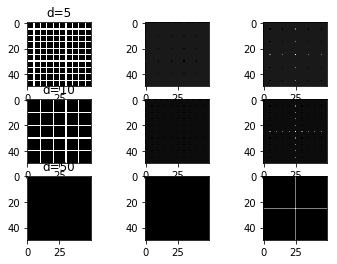

In [5]:
for i, d in enumerate((5, 10, 50)):
    img, fft, sfft = dftQ1(d)
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'd={d}')
    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(fft.real, cmap='gray')
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(sfft.real, cmap='gray')

# Transform ́ee de Fourier d’une image r ́eelle

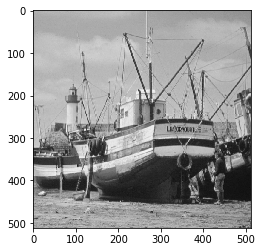

In [6]:
boat = mimg.imread('images/boat512.gif')
plt.imshow(boat, cmap='gray')

In [93]:
def mapplot_fft(x, *fs, figsize=(10, 10)):
    fig, plts = plt.subplots(1, len(fs), figsize=figsize)
    for i, (f, p) in enumerate(zip(fs, plts if isinstance(plts, np.ndarray) else [plts])):
        f, t = f if isinstance(f, tuple) else (f, None)
        p.imshow(f(x).real, cmap='gray')
        p.set_title(t) if t else None

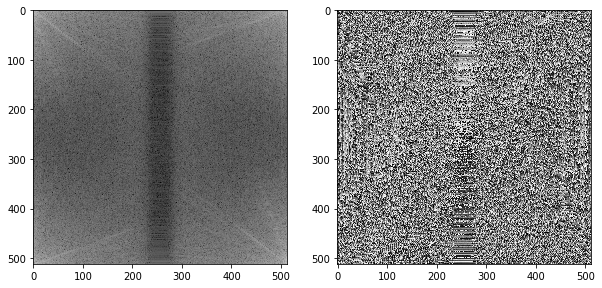

In [88]:
mapplot_fft(np.fft.fft2(boat), lambda fft: np.absolute(np.log(fft)), np.angle)

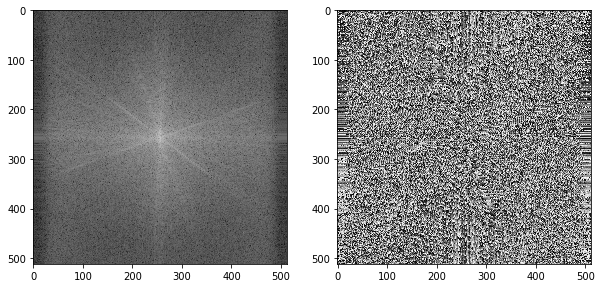

In [89]:
mapplot_fft(np.fft.fftshift(np.fft.fft2(boat)), lambda fft: np.absolute(np.log(fft)), np.angle)

In [47]:
def comp(*fs):
    if len(fs) == 1:
        return fs[0]
    return lambda *x: fs[0](comp(*fs[1:])(*x))

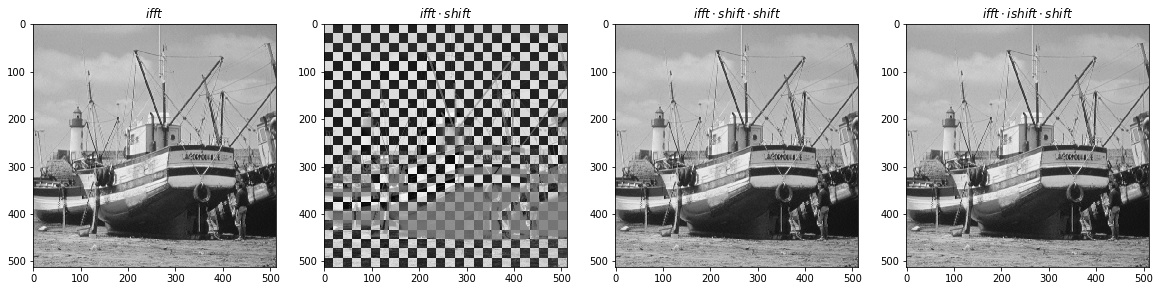

In [97]:
mapplot_fft(np.fft.fft2(boat),
            (np.fft.ifft2, '$ifft$'),
            (comp(np.fft.ifft2, np.fft.fftshift), '$ifft \cdot shift$'),
            (comp(np.fft.ifft2, np.fft.fftshift, np.fft.fftshift), '$ifft \cdot shift \cdot shift$'),
            (comp(np.fft.ifft2, np.fft.ifftshift, np.fft.fftshift), '$ifft \cdot ishift \cdot shift$'),
            figsize=(20, 20))

**Question:** Why has $shift \cdot shift$ the same effect as $ishift \cdot shift$?

# Inversion de phase et de module

In [98]:
lena, barbara = [mimg.imread(f'images/{i}') for i in ('lena.bmp', 'barbara.png')]

In [165]:
def imshow_mat(matrix, figsize=(10, 10)):
    fig, axes = plt.subplots(len(matrix), len(matrix[0]), figsize=figsize)
    def showrow(row, y=None):
        for x, img in enumerate(row):
            if y is not None:
                axes[y, x].imshow(img, cmap='gray')
            else:
                axes[x].imshow(img, cmap='gray')
    if len(matrix) == 1:
        showrow(matrix[0])
    else:
        for y, row in enumerate(matrix):
            showrow(row, y)

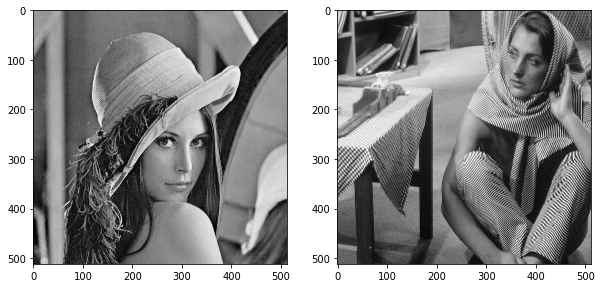

In [166]:
imshow_mat([[lena,barbara]])

In [186]:
def abs_angle(img):
    return np.absolute(img), np.angle(img)
lena_abs, lena_angle = abs_angle(lena)
barbara_abs, barbara_angle = abs_angle(barbara)

In [180]:
def make_image(modulus, phase):
    return modulus * np.exp(1j * phase)

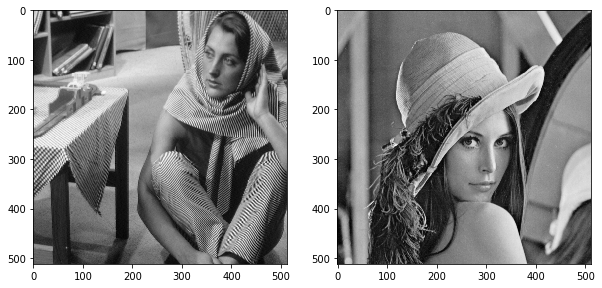

In [190]:
imshow_mat([[make_image(barbara_abs, lena_angle).real, make_image(lena_abs, barbara_angle).real]])